<a href="https://colab.research.google.com/github/toshkumarashu/repo1/blob/master/DataPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
titanic_data=sns.load_dataset("titanic")
titanic_data=titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [3]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled=scaler.transform(titanic_data)

In [5]:
titanic_data_scaled=pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

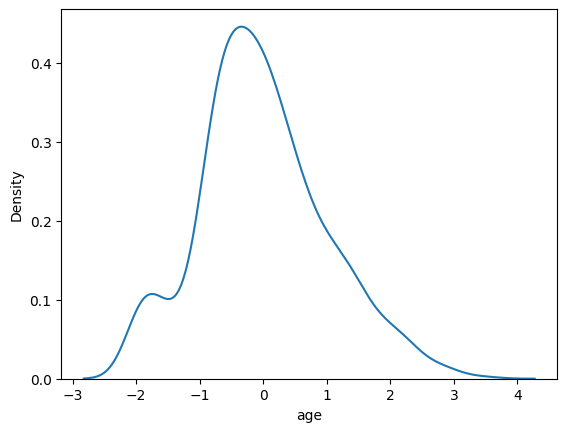

In [6]:
sns.kdeplot(titanic_data_scaled['age'])

**Handling Missing **

In [7]:
titanic_data=sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic_data=titanic_data[["survived","pclass","age","fare"]]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [9]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [11]:
titanic_data.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [12]:
median=titanic_data.age.median()
print(median)

mean=titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [14]:
titanic_data["Median_Age"]=titanic_data.age.fillna(median)
titanic_data['Mean_Age']=titanic_data.age.fillna(mean)
titanic_data['Mean_Age']=np.round(titanic_data['Mean_Age'],1)
titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


# **Frequent Category Imputation**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data=sns.load_dataset("titanic")

titanic_data=titanic_data[["embark_town","age","fare"]]

titanic_data.head()

,embark_town,age,fare
0,Southampton,22.0,7.2500
1,Cherbourg,38.0,71.2833
2,Southampton,26.0,7.9250
3,Southampton,35.0,53.1000
4,Southampton,35.0,8.0500


In [16]:
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passenger')

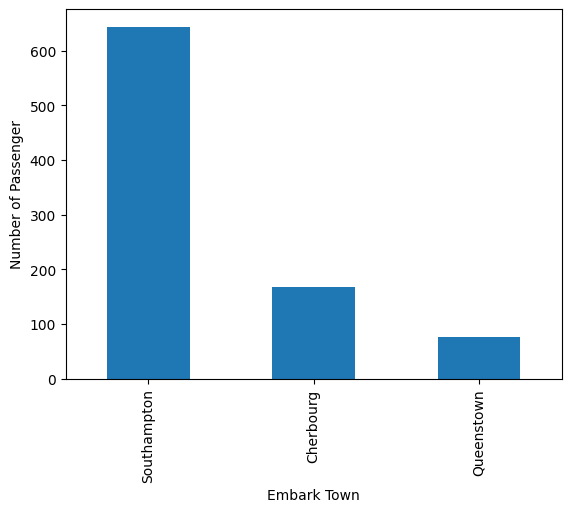

In [17]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark Town")
plt.ylabel("Number of Passenger")

In [18]:
titanic_data.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [19]:
titanic_data.embark_town.fillna("Southampton",inplace=True)

# **Categorical  Data Encoding**

In [22]:
titanic_data=sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
titanic_data=titanic_data[["sex","class","embark_town"]]
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [25]:
import pandas as pd
temp=pd.get_dummies(titanic_data['sex'])
temp.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [26]:
pd.concat([titanic_data["sex"],pd.get_dummies(titanic_data['sex'])],axis=1).head()

,sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True


In [29]:
temp=pd.get_dummies(titanic_data["embark_town"])
temp.head()

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


# **Label Encoding**

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(titanic_data['class'])
titanic_data['le_class']=le.transform(titanic_data['class'])
titanic_data.head()

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


# **Data Descretization**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

diamond_data=sns.load_dataset("diamonds")

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


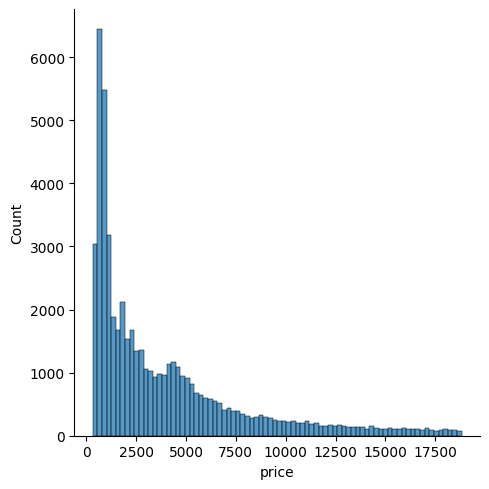

In [32]:
sns.displot(diamond_data['price'])

In [34]:
price_range=diamond_data['price'].max()-diamond_data['price'].min()
print(price_range)

18497


In [35]:
price_range/10

1849.7

In [36]:
lower_interval=int(np.floor(diamond_data['price'].min()))
upper_interval=int(np.ceil(diamond_data['price'].max()))
interval_length=int(np.round(price_range/10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [41]:
total_bins=[i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [42]:
bin_labels=['Bin_no_'+str(i) for i in range(1,len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [44]:
diamond_data['price_bins']=pd.cut(x=diamond_data['price'],bins=total_bins,labels=bin_labels,include_lowest=True)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

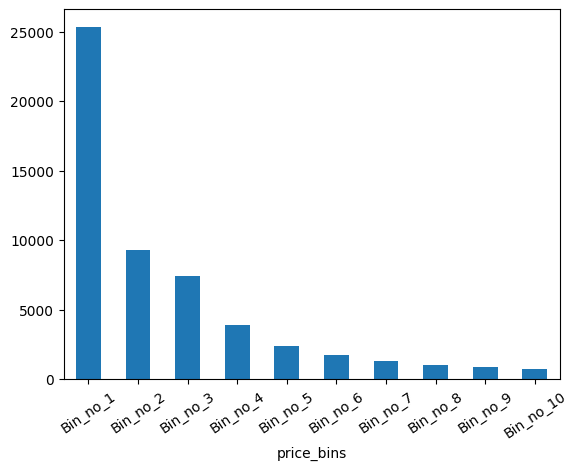

In [45]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=34)

# **Handling Outlier**

In [46]:
titanic_data=sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='age'>

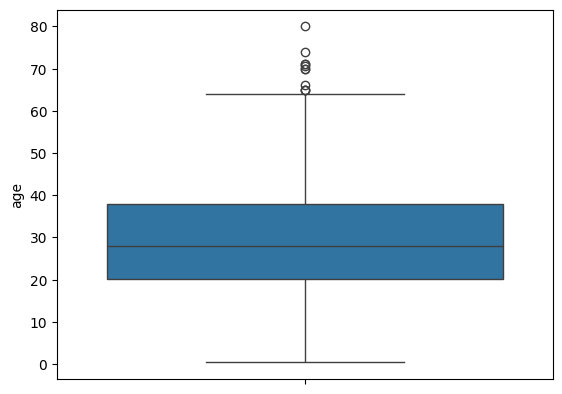

In [47]:
sns.boxplot(y="age",data=titanic_data)

In [50]:
IQR=titanic_data["age"].quantile(0.75)-titanic_data["age"].quantile(0.25)
lower_age_limit=titanic_data["age"].quantile(0.25)-(IQR*1.5)
upper_age_limit=titanic_data["age"].quantile(0.75)+(IQR*1.6)
print(lower_age_limit)
print(upper_age_limit)

-6.6875
66.6


In [53]:
age_outliers=np.where(titanic_data["age"]>upper_age_limit,True,np.where(titanic_data["age"]<lower_age_limit,True,False))


In [54]:
titanic_without_age_outliers=titanic_data.loc[~(age_outliers),]
titanic_data.shape,titanic_without_age_outliers.shape

((891, 15), (884, 15))

<Axes: ylabel='age'>

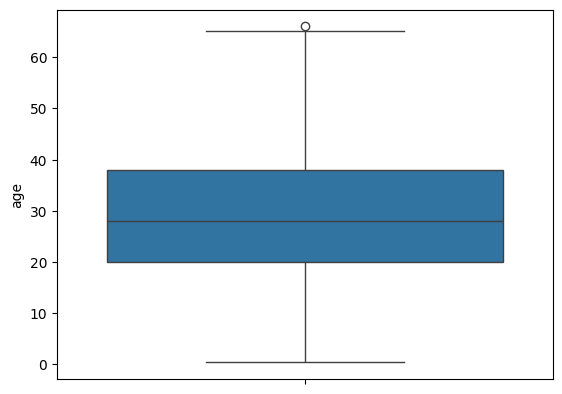

In [55]:
sns.boxplot(y='age',data=titanic_without_age_outliers)

# **Feature Selection**

In [60]:
import pandas as pd
import numpy as np

wine_data=pd.read_csv("winequality-red.csv")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


dividing data into features and labels

In [61]:
features=wine_data.drop(["quality"],axis=1)
labels=wine_data.filter(["quality"],axis=1)

In [62]:
features.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

Filtering features based on threshold

In [65]:
from sklearn.feature_selection import VarianceThreshold
var_sel=VarianceThreshold(threshold=(0.1))
var_sel.fit(features)

VarianceThreshold(threshold=0.1)

In [66]:
attributes_to_retain=features.columns[var_sel.get_support()]
attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [68]:
attributes_to_filter=[attr for attr in features.columns
                       if attr not in features.columns[var_sel.get_support()]]
attributes_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

In [69]:
filtered_dataset=features.drop(attributes_to_filter,axis=1)
filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4


Feature selection on Correlation

In [71]:
correlation_matrix=features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<Axes: >

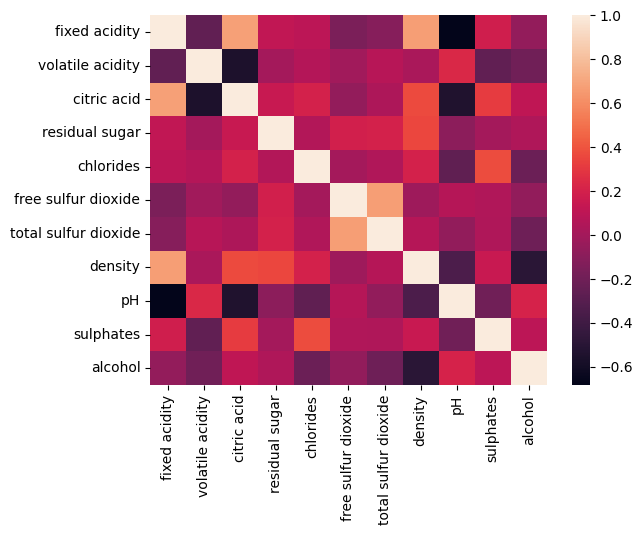

In [72]:
import seaborn as sns
sns.heatmap(correlation_matrix)

In [73]:
correlated_features_matrix=set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>0.6:
      corr_col=correlation_matrix.columns[i]
      correlated_features_matrix.add(corr_col)

In [76]:
len(correlated_features_matrix)

4

In [77]:
print(correlated_features_matrix)

{'density', 'citric acid', 'total sulfur dioxide', 'pH'}


In [78]:
filtered_dataset=features.drop(correlated_features_matrix,axis=1)
filtered_dataset.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4
